<a href="https://colab.research.google.com/github/syrine55/Mobile_CodeName_One/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                                                    ***Credit Risk Prediction***




## <a>I . Business Understanding</a>

#### <a> Problem Definition </a> 
Many of the world's leading banks and increasingly government agencies are using intelligent agent technologies, also known as chatbots to interact with consumers. 

These chatbots are able to not only handle a conversation with clients but also they can help them make decisions.

One of the most frequently asked questions we descovered in our database is whether is it possible to get a loan.For this reason we thought about adding a service that our chatbot can offer which is to credit risk prediction.


> ##### <a> Credit risk</a> 
Credit risk is the risk of loss due to a borrower not repaying a loan.Credit risk is considered to be higher when the borrower does not have sufficient cash flows to pay the creditor, or it does not have sufficient assets to liquidate to repay the creditor. If the risk of nonpayment is higher, the lender is more likely to demand compensation in the form of a higher interest rate.






> ##### <a>Types of Credit Risk</a>
 __Good Risk__: An investment that one believes is likely to be profitable. The term most often refers to a loan made to a creditworthy person or company. Good risks are considered exceptionally likely to be repaid.               
 __Bad Risk__: A loan that is unlikely to be repaid because of bad credit **history**, insufficient income, or some other reason. A bad risk increases the risk to the lender and the likelihood of default on the part of the borrower.




#### <a>Objective</a> 
classify a person as good or bad credit risk.

## <a>II . Data Understanding</a>

The dataset contains 1000 entries with 20 independent variables (7 numerical, 13 categorical) and 1 target variable prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.The attributes are:

> ##### <a name="independent_variable">Independent Variables</a>
   * Attribute 1:  (qualitative) __Status of existing checking account__                           
      A11 :      ... <    0 DM                           
      A12 : 0 <= ... <  200 DM                                   
      A13 :      ... >= 200 DM / salary assignments for at least 1 year                           
      A14 : no checking account


> * Attribute 2:  (numerical) __Duration in month__

>  * Attribute 3:  (qualitative) __Credit history__               
      A30 : no credits taken/all credits paid back duly                   
      A31 : all credits at this bank paid back duly                       
      A32 : existing credits paid back duly till now                       
      A33 : delay in paying off in the past                           
      A34 : critical account/other credits existing (not at this bank)

> * Attribute 4:  (qualitative)    __Purpose__              
      A40 : car (new)                         
      A41 : car (used)                              
      A42 : furniture/equipment                              
      A43 : radio/television                 
      A44 : domestic appliances                     
      A45 : repairs                        
      A46 : education                      
      A47 : vacation                    
      A48 : retraining                     
      A49 : business                         
      A410 : others

> * Attribute 5:  (numerical) __Credit amount__

> * Attibute 6:  (qualitative) __Savings account/bonds__           
      A61 :          ... <  100 DM            
      A62 :   100 <= ... <  500 DM           
      A63 :   500 <= ... < 1000 DM            
      A64 :          .. >= 1000 DM                   
      A65 :   unknown/ no savings account         
      

> * Attribute 7:  (qualitative) __Present employment since__      
      A71 : unemployed                       
      A72 :       ... < 1 year           
      A73 : 1  <= ... < 4 years         
      A74 : 4  <= ... < 7 years            
      A75 :       .. >= 7 years    

> * Attribute 8:  (numerical) __Installment rate in percentage of disposable income__

> * Attribute 9:  (qualitative) __Personal status and sex__                      
        A91 : male   : divorced/separated               
        A92 : female : divorced/separated/married
        A93 : male   : single               
        A94 : male   : married/widowed              
        A95 : female : single

>  * Attribute 10: (qualitative) __Other debtors / guarantors__                   
        A101 : none                  
        A102 : co-applicant                   
        A103 : guarantor 


>  * Attribute 11: (numerical) __Present residence since__

>* Attribute 12: (qualitative) __Property__
        A121 : real estate                        
        A122 : if not A121 : building society savings agreement/life insurance                           
        A123 : if not A121/A122 : car or other, not in attribute 6           
        A124 : unknown / no property    


> * Attribute 13: (numerical) __Age in years__

> * Attribute 14: (qualitative) __Other installment plans__    
        A141 : bank   
        A142 : stores    
        A143 : none  

> * Attribute 15: (qualitative) __Housing__           
        A151 : rent       
        A152 : own          
        A153 : for free 

> * Attribute 16: (numerical) __Number of existing credits at this bank__


> * Attribute 17: (qualitative) __Job__
        A171 : unemployed/ unskilled  - non-resident           
        A172 : unskilled - resident                  
        A173 : skilled employee / official                                
        A174 : management/ self-employed/highly qualified employee/ officer 


>* Attribute 18: (numerical) __Number of people being liable to provide maintenance for__


> * Attribute 19: (qualitative) __Telephone__             
    A191 : none              
    A192 : yes, registered under the customers name  


> * Attribute 20: (qualitative) __foreign worker__              
    A201 : yes         
    A202 : no

> 
##### <a name="target_variable">Target Variable</a>                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__








        






















      









In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
#import scikitplot as skplt
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


We start by giving names to the columns:

In [4]:
headers=["Checking_account","Duration_in_month","Credit_history",\
         "Purpose","Credit_amount","Savings_account","Present_employment_since",\
         "Installment_rate_in percentage_of_disposable_income","Status_Sex",\
         "Other_debtors_guarantors","Present_residence_since","Property","Age",\
        "Other_installment_plans","Housing","Number_credit",\
        "Job","Number_people_maintenance","Telephone","foreign_worker","Risk"]
df.columns=headers
df_cat=df

For data visualization later , and to get to understand better our dataset, we need to replace some values in the dataset by its real value (detailed in the dataset description above)

In [5]:
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Checking_account"]=df["Checking_account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit_history"]=df["Credit_history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings_account"]=df["Savings_account"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present_employment_since"]=df["Present_employment_since"].map(Present_employment)



Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Status_Sex"]=df["Status_Sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other_debtors_guarantors"]=df["Other_debtors_guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)




Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other_installment_plans"]=df["Other_installment_plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)




Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)



foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign_worker"]=df["foreign_worker"].map(foreign_worker)



risk={1:"Good Risk", 2:"Bad Risk"}
df["Risk"]=df["Risk"].map(risk)

In [6]:
df.head()

,Checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in percentage_of_disposable_income,Status_Sex,Other_debtors_guarantors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_credit,Job,Number_people_maintenance,Telephone,foreign_worker,Risk
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Checking_account                                     1000 non-null   object
 1   Duration_in_month                                    1000 non-null   int64 
 2   Credit_history                                       1000 non-null   object
 3   Purpose                                              1000 non-null   object
 4   Credit_amount                                        1000 non-null   int64 
 5   Savings_account                                      1000 non-null   object
 6   Present_employment_since                             1000 non-null   object
 7   Installment_rate_in percentage_of_disposable_income  1000 non-null   int64 
 8   Status_Sex                                           1000 non-null   object
 9 

In [8]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,Checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in percentage_of_disposable_income,Status_Sex,Other_debtors_guarantors,Present_residence_since,Property,Age,Other_installment_plans,Housing,Number_credit,Job,Number_people_maintenance,Telephone,foreign_worker,Risk
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,12,existing credits paid back duly till now,furniture/equipment,1736,<100 DM,4<= <7 years,3,female:divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes,Good Risk
996,<0 DM,30,existing credits paid back duly till now,car (used),3857,<100 DM,1<= < 4 years,4,male:divorced/separated,none,4,savings agreement/life insurance,40,none,own,1,management/ highly qualified employee,1,yes,yes,Good Risk
997,no checking account,12,existing credits paid back duly till now,radio/television,804,<100 DM,>=7 years,4,male:single,none,4,car or other,38,none,own,1,skilled employee / official,1,none,yes,Good Risk
998,<0 DM,45,existing credits paid back duly till now,radio/television,1845,<100 DM,1<= < 4 years,4,male:single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,yes,yes,Bad Risk


In [9]:
import plotly.express as px
Purpose = df['Purpose']
fig = px.histogram(df, x="Purpose", color="Purpose")
fig.update_layout(
    title={
          'text':"Purpose breakdown",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

The histogram chart shows that most of credit purpose is related to car prurchase , followed by radio/TV one.

In [10]:
import ipywidgets as widgets
import plotly.graph_objects as go
# Create dimensions
gender_dim = go.parcats.Dimension(values=df['Status_Sex'], label="Sex")
Housing_dim = go.parcats.Dimension(values=df.Housing, label="Housing")
#Saving_accounts_dim = go.parcats.Dimension(values=credit['Saving accounts'], label="Saving accounts")
Checking_account_dim = go.parcats.Dimension(values=df['Checking_account'], label="Checking account")
Purpose_dim = go.parcats.Dimension(values=df.Purpose, label="Purpose")
Risk_dim = go.parcats.Dimension(values=df["Risk"], label="Risk")
# Create parcats trace
color = np.zeros(len(df), dtype='uint8')
colorscale = [[0, 'gray'], [0.33, 'firebrick'],
              [0.33, 'firebrick'], [0.66, 'blue'],
              [0.66, 'blue'], [1.0, 'green']]
fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim, Housing_dim,Checking_account_dim,Purpose_dim,Risk_dim],
        #line={'color':color,'colorscale': colorscale},
         hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])
fig.show()

The parallel categories diagram is a visualization of multi-dimensional categorical data sets. Each variable in the data set is represented by a column of rectangles, where each rectangle corresponds to a discrete value taken on by that variable. The relative heights of the rectangles reflect the relative frequency of occurrence of the corresponding value.

In [11]:
SC =df.loc[:,['Purpose','Credit_amount']]
fig = px.box(SC, x="Purpose", y="Credit_amount", color="Purpose")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Checking_account                                     1000 non-null   object
 1   Duration_in_month                                    1000 non-null   int64 
 2   Credit_history                                       1000 non-null   object
 3   Purpose                                              1000 non-null   object
 4   Credit_amount                                        1000 non-null   int64 
 5   Savings_account                                      1000 non-null   object
 6   Present_employment_since                             1000 non-null   object
 7   Installment_rate_in percentage_of_disposable_income  1000 non-null   int64 
 8   Status_Sex                                           1000 non-null   object
 9 

In [40]:
fig = px.scatter(df, x="Credit_amount", y="Age", animation_frame="Duration_in_month", animation_group="Purpose",
           size="Age", color="Status_Sex", hover_name="Purpose",
           log_x=True, size_max=100, range_x=[10,10000], range_y=[10,100])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

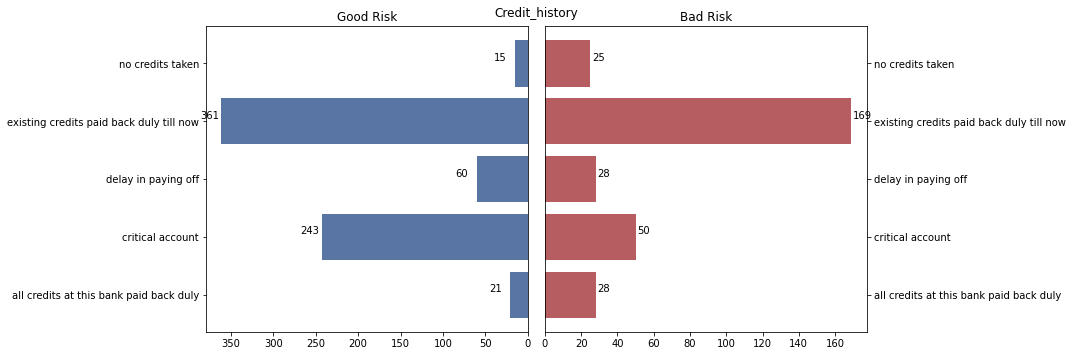

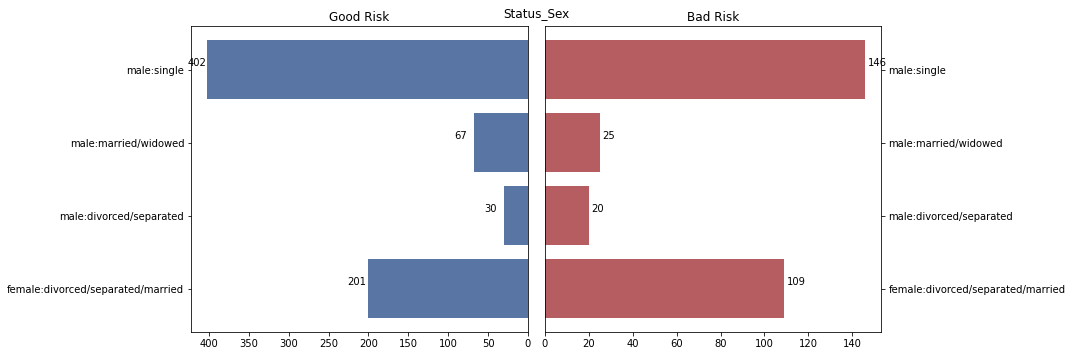

In [21]:
#@title
def visualize_distribution(attr):
    good_risk_df = df[df["Risk"]=="Good Risk"]
    bad_risk_df = df[df["Risk"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Risk']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Risk']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Risk'].index.tolist(), attr_good_risk_df['Risk'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Risk'].index.tolist(), attr_bad_risk_df['Risk'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Risk'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Risk'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Risk'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Risk'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()
visualize_distribution("Credit_history")
visualize_distribution("Status_Sex")

In [27]:
SA = df.loc[:,['Status_Sex','Age']]
fig = px.box(SA, x="Status_Sex", y="Age", points="all",color="Status_Sex")
fig.update_layout(
    title={
          'text':"Sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Status : Sex",
    yaxis_title="Age",
   
)
fig.show()

In [41]:
df.to_csv("german_data_credit_cat.csv",index=False)